In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

## Exploring Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
print(df.shape)

(31984, 21)


In [5]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [6]:
print(df.isnull().sum())

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64


In [7]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


(array([ 1468.,  4274.,  4690.,  6579.,  6108.,  4665.,  2887.,  1020.,
          239.,    54.]),
 array([ 18. ,  24.3,  30.6,  36.9,  43.2,  49.5,  55.8,  62.1,  68.4,
         74.7,  81. ]),
 <a list of 10 Patch objects>)

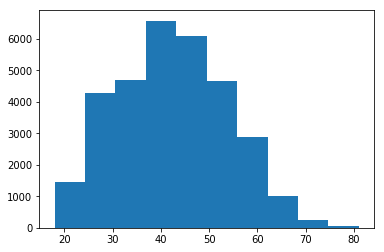

In [8]:
plt.hist(df.age)

(array([  4.40000000e+01,   1.15700000e+03,   1.06620000e+04,
          1.06730000e+04,   5.59100000e+03,   2.73100000e+03,
          9.26000000e+02,   1.92000000e+02,   6.00000000e+00,
          2.00000000e+00]),
 array([  3.08 ,   4.829,   6.578,   8.327,  10.076,  11.825,  13.574,
         15.323,  17.072,  18.821,  20.57 ]),
 <a list of 10 Patch objects>)

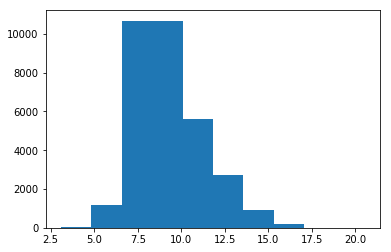

In [9]:
plt.hist(df.pace)

(array([  4.40000000e+01,   1.16600000e+03,   1.06650000e+04,
          1.06570000e+04,   5.58300000e+03,   2.73700000e+03,
          9.26000000e+02,   1.94000000e+02,   1.00000000e+01,
          2.00000000e+00]),
 array([  80.6  ,  126.428,  172.256,  218.084,  263.912,  309.74 ,
         355.568,  401.396,  447.224,  493.052,  538.88 ]),
 <a list of 10 Patch objects>)

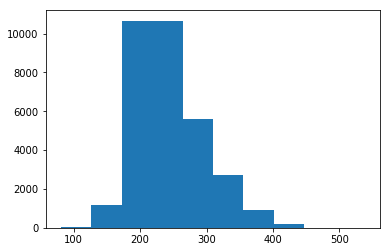

In [10]:
plt.hist(df.official)

## Cleaning up the Dataset

In [11]:
data = df.copy()

In [12]:
data = data.drop(['name', 'ctz', 'state'], axis=1)

In [13]:
data.dropna(inplace=True)

## Clustering

#### K-means

In [50]:
X = data.loc[:, ['official', '5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'pace', 'division', 'age', 
                 'genderdiv']]
Y = data.loc[:, ['gender', 'bib', 'country', 'city']]

In [44]:
# Change the gender data to numeric. 
y = np.where(Y.gender == 'M', 1, 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


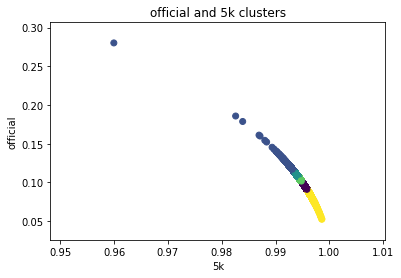

Comparing k-means clusters against gender:
col_0     0     1     2     3    4
row_0                             
0      2167  3057  4812  3739  591
1      2782  4295  5463  4122  955


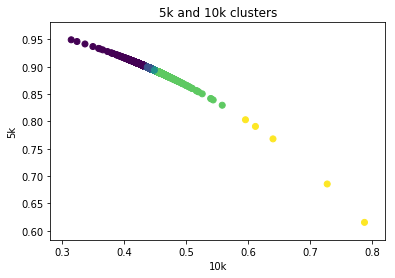

Comparing k-means clusters against gender:
col_0    0     1      2     3  4
row_0                           
0      641  4088   8419  1216  2
1      580  4034  10851  2149  3


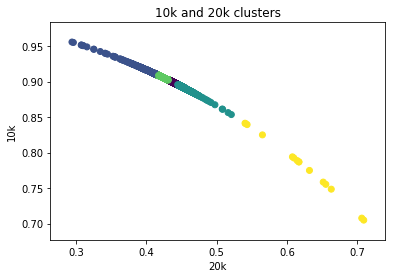

Comparing k-means clusters against gender:
col_0     0    1     2     3  4
row_0                          
0      5509  423  6350  2077  7
1      5553  363  9990  1703  8


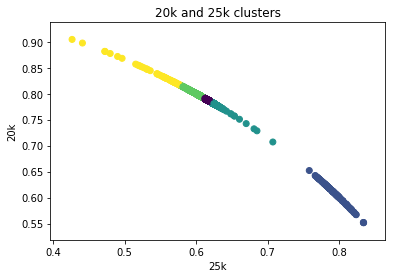

Comparing k-means clusters against gender:
col_0     0    1      2     3   4
row_0                            
0      4500  108   8666  1058  34
1      4213   64  11999  1305  36


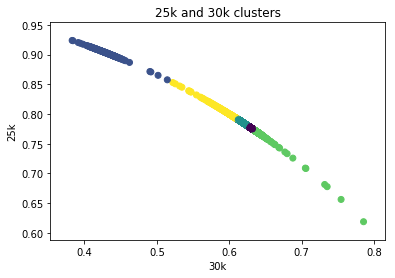

Comparing k-means clusters against gender:
col_0     0    1     2     3    4
row_0                            
0      5545  112  1618  6940  151
1      5483   66  2621  9184  263


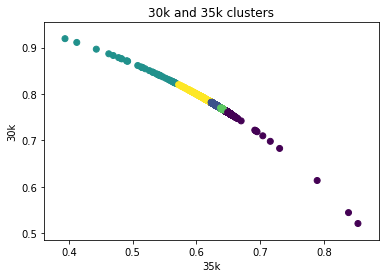

Comparing k-means clusters against gender:
col_0     0     1   2     3    4
row_0                           
0      7053  1508  18  5613  174
1      7953  3065  27  6154  418


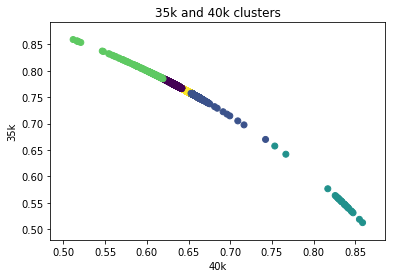

Comparing k-means clusters against gender:
col_0     0     1   2    3     4
row_0                           
0       602  9342  12   46  4364
1      1851  8443  15  144  7164


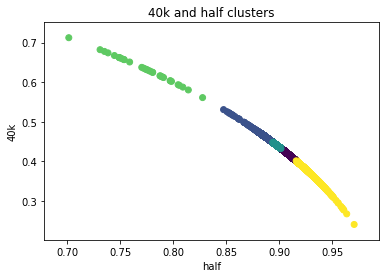

Comparing k-means clusters against gender:
col_0     0     1     2   3     4
row_0                            
0      2724  5586  5624  15   417
1      3951  6762  5823  19  1062


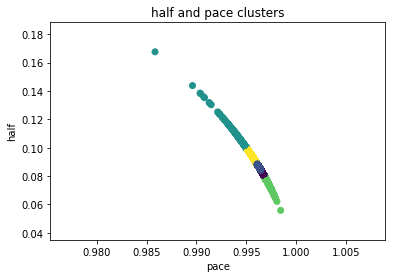

Comparing k-means clusters against gender:
col_0     0     1    2     3     4
row_0                             
0      5391  2987   93  5153   742
1      5624  3975  254  5945  1819


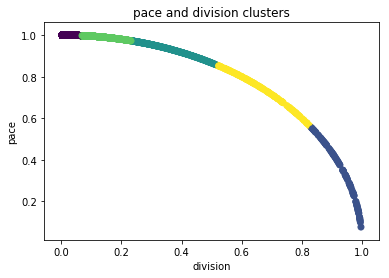

Comparing k-means clusters against gender:
col_0      0   1    2    3   4
row_0                         
0      13432  45  152  666  71
1      16566  50  177  752  72


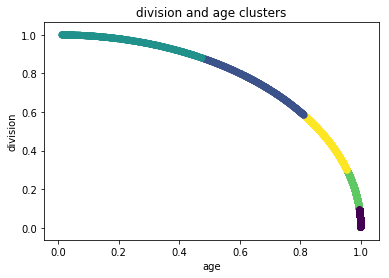

Comparing k-means clusters against gender:
col_0      0    1    2     3    4
row_0                            
0      11574  296  231  1705  560
1      13887  381  301  2323  725


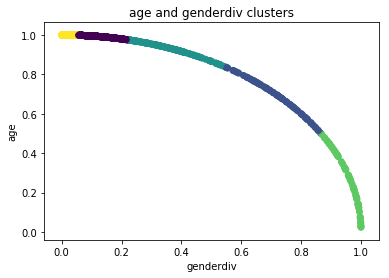

Comparing k-means clusters against gender:
col_0    0   1   2   3      4
row_0                        
0      477  34  92  29  13734
1      477  48  97  36  16959


In [57]:
for each in range(len(X.columns) -1):
    # Select the columns to cluster
    new_X = data.loc[:, [X.columns[each], X.columns[each + 1]]]
    
    # Convert my features from objects to numbers
    new_X = new_X.convert_objects(convert_numeric=True)
    
    # Fill any nulls with the mean value for that column. 
    for i in new_X.columns:
        new_X[i] = new_X[i].fillna(new_X[i].mean()) 

    # Normalize the data.
    X_norm = normalize(new_X)

    # Calculate predicted values.
    y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_norm)

    # Plot the solution with gender.
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_pred)
    plt.ylabel("{}".format(X.columns[each]))
    plt.xlabel("{}".format(X.columns[each + 1]))
    plt.title("{} and {} clusters".format(X.columns[each], X.columns[each + 1]))
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against gender:')
    print(pd.crosstab(y, y_pred))

#### MiniBatch K-means

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


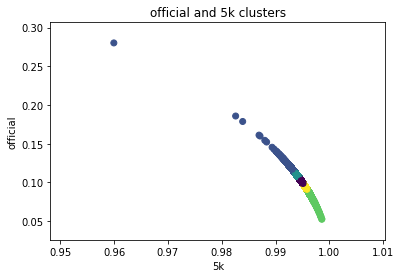

Comparing mini batch k-means solutions against gender:
col_0     0     1     2    3     4
row_0                             
0      3352  3424  5335  584  1671
1      3734  4743  6051  942  2147


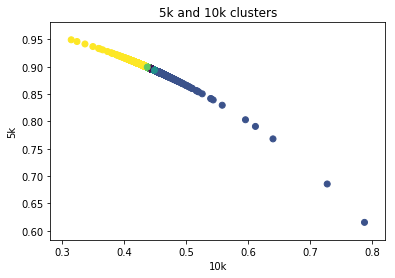

Comparing mini batch k-means solutions against gender:
col_0     0     1     2     3     4
row_0                              
0      3129  2474  5736  1961  1066
1      3375  4129  7326  1870   917


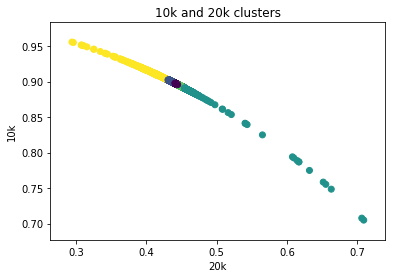

Comparing mini batch k-means solutions against gender:
col_0     0     1    2     3     4
row_0                             
0      4362  3661  408  4235  1700
1      5202  3333  792  6907  1383


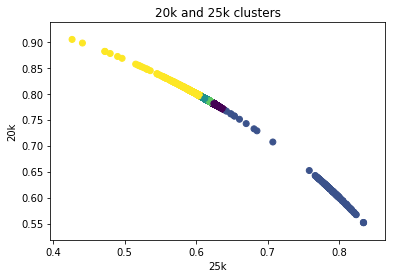

Comparing mini batch k-means solutions against gender:
col_0     0    1     2     3    4
row_0                            
0      5540  114  3145  4932  635
1      8674   68  2968  5073  834


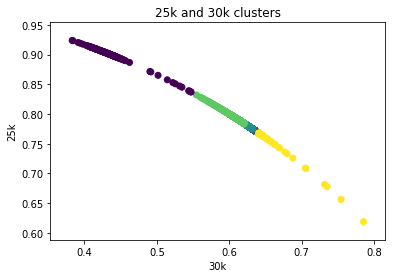

Comparing mini batch k-means solutions against gender:
col_0    0     1     2     3     4
row_0                             
0      117  5549  4440  1231  3029
1       70  6038  4579  2179  4751


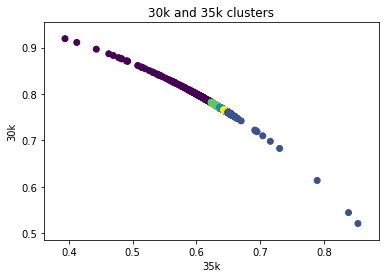

Comparing mini batch k-means solutions against gender:
col_0    0     1     2     3     4
row_0                             
0      184  3299  3748  1294  5841
1      412  4222  4495  2760  5728


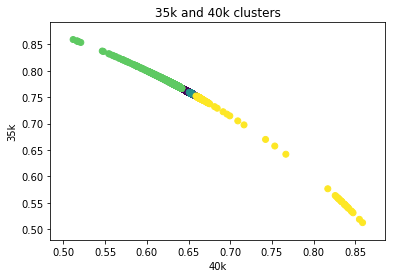

Comparing mini batch k-means solutions against gender:
col_0     0     1     2     3     4
row_0                              
0      2596  5238  4285   578  1669
1      5011  4393  4800  1797  1616


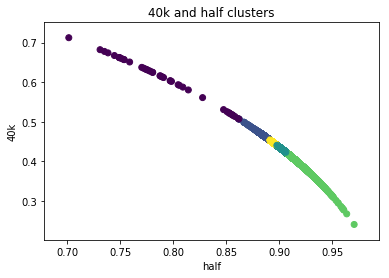

Comparing mini batch k-means solutions against gender:
col_0   0     1     2     3     4
row_0                            
0      21  3485  4404  1604  4852
1      24  4572  4885  3140  4996


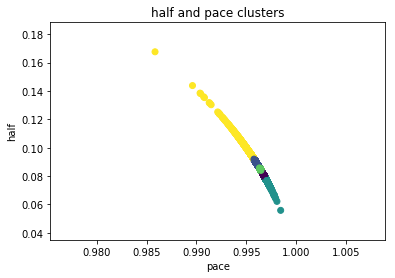

Comparing mini batch k-means solutions against gender:
col_0     0     1     2     3     4
row_0                              
0      5036  1549  4183  3201   397
1      5096  2660  5017  3740  1104


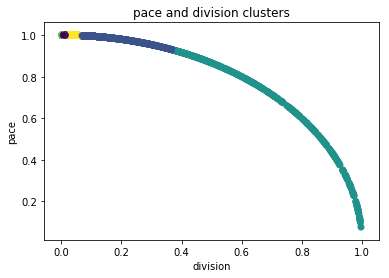

Comparing mini batch k-means solutions against gender:
col_0     0    1    2     3     4
row_0                            
0      4380  742  171  6836  2237
1      5450  839  189  8777  2362


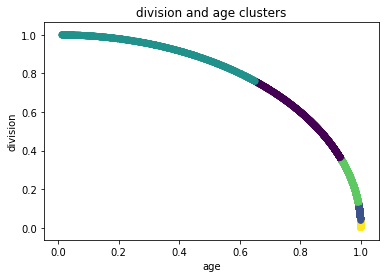

Comparing mini batch k-means solutions against gender:
col_0    0     1    2     3     4
row_0                            
0      574  3468  336  1420  8568
1      742  4875  446  1926  9628


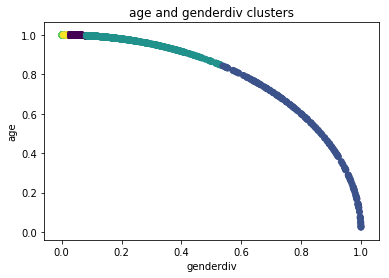

Comparing mini batch k-means solutions against gender:
col_0     0   1    2     3     4
row_0                           
0      1945  64  368  6309  5680
1      2072  84  375  8678  6408


In [58]:
for each in range(len(X.columns) -1):
    # Select the columns to cluster
    new_X = data.loc[:, [X.columns[each], X.columns[each + 1]]]
    
    # Convert my features from objects to numbers
    new_X = new_X.convert_objects(convert_numeric=True)
    
    # Fill any nulls with the mean value for that column. 
    for i in new_X.columns:
        new_X[i] = new_X[i].fillna(new_X[i].mean()) 

    # Normalize the data.
    X_norm = normalize(new_X)
    
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=5,
        batch_size=200)
    minibatchkmeans.fit(X_norm)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_norm)

    # Plot the solution with gender.
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=predict_mini)
    plt.ylabel("{}".format(X.columns[each]))
    plt.xlabel("{}".format(X.columns[each + 1]))
    plt.title("{} and {} clusters".format(X.columns[each], X.columns[each + 1]))
    plt.show()
    
    # Check the MiniBatch model against gender.
    print('Comparing mini batch k-means solutions against gender:')
    print(pd.crosstab(y, predict_mini))

#### Mean Shift 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 3


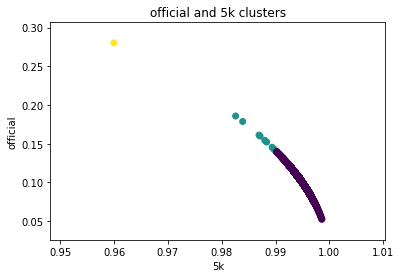

Comparing Mean Shift solutions against gender:
col_0      0  1  2
row_0             
0      14362  4  0
1      17609  7  1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 11


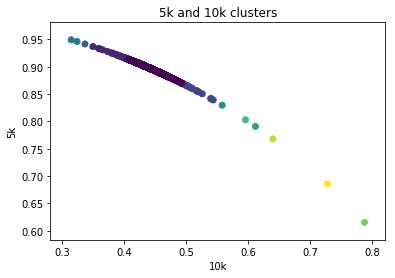

Comparing Mean Shift solutions against gender:
col_0     0   1   2   3   4   5   6   7   8   9   10
row_0                                               
0      14338  19   6   0   1   0   0   1   1   0   0
1      17582  14  15   1   1   1   1   0   0   1   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 10


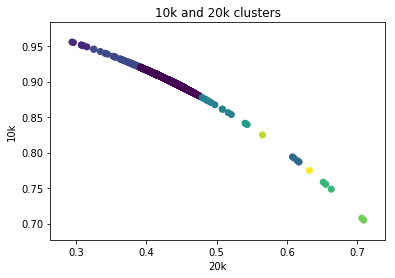

Comparing Mean Shift solutions against gender:
col_0      0  1   2  3  4  5  6  7  8  9
row_0                                   
0      14319  4  31  3  5  1  2  0  0  1
1      17562  3  37  2  7  2  1  2  1  0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 14


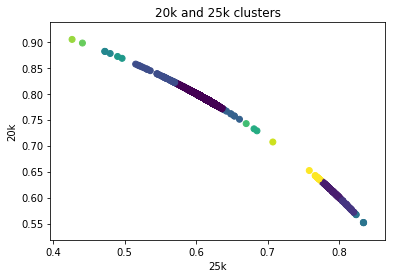

Comparing Mean Shift solutions against gender:
col_0     0   1   2   3   4   5   6   7   8   9   10  11  12  13
row_0                                                           
0      14222  83  14  26   4   4   3   1   1   0   0   0   1   7
1      17517  36  19  27   4   1   0   1   1   1   1   1   0   8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 11


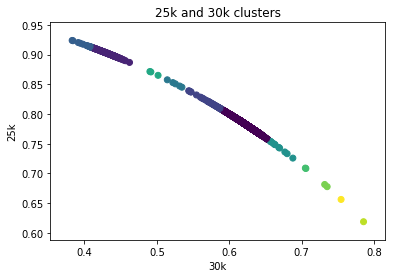

Comparing Mean Shift solutions against gender:
col_0     0    1   2   3   4   5   6   7   8   9   10
row_0                                                
0      14219  101  26  10   2   4   1   2   0   0   1
1      17504   55  35   8   3   7   2   0   2   1   0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 14


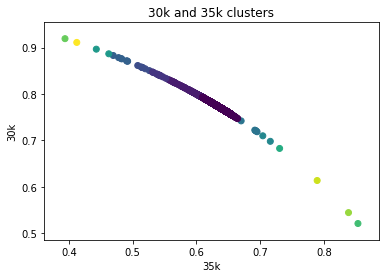

Comparing Mean Shift solutions against gender:
col_0     0   1   2   3   4   5   6   7   8   9   10  11  12  13
row_0                                                           
0      14294  52   5   4   4   4   0   1   1   1   0   0   0   0
1      17496  97   9   3   3   2   2   1   0   0   1   1   1   1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 12


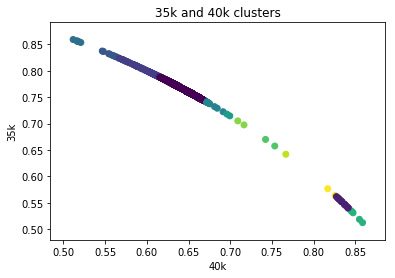

Comparing Mean Shift solutions against gender:
col_0     0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                   
0      14312  10  30   2   3   6   1   1   0   0   1   0
1      17496   8  84   6   3   9   1   4   2   2   0   2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 4


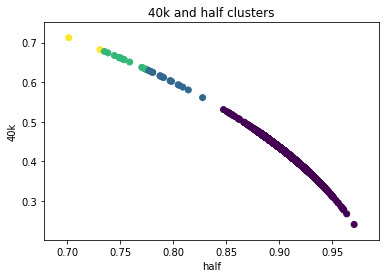

Comparing Mean Shift solutions against gender:
col_0      0   1  2  3
row_0                 
0      14351   7  7  1
1      17598  11  7  1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 3


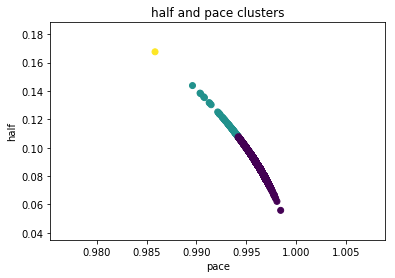

Comparing Mean Shift solutions against gender:
col_0      0   1  2
row_0              
0      14339  27  0
1      17560  56  1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 19


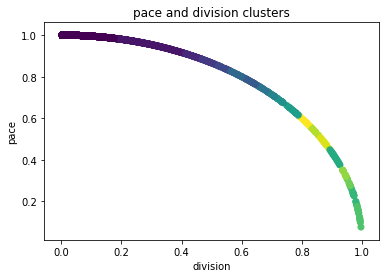

Comparing Mean Shift solutions against gender:
col_0     0    1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
row_0                                                                           
0      14025  182  22  19  14  15   8   8   6   7   9   7   6  11   4   5   5   
1      17238  209  28  19  17  11  11   7   6   7   9  12   6  10   4   6   7   

col_0  17  18  
row_0          
0       7   6  
1       6   4  


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 3


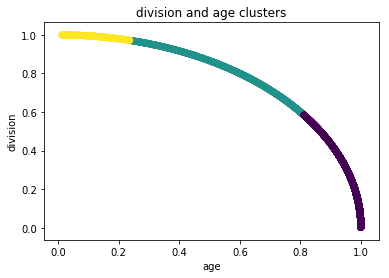

Comparing Mean Shift solutions against gender:
col_0      0    1    2
row_0                 
0      13850  401  115
1      16945  530  142


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Number of estimated clusters: 34


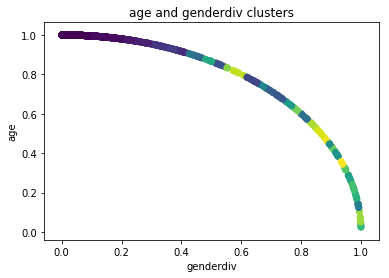

Comparing Mean Shift solutions against gender:
col_0     0    1   2   3   4   5   6   7   8   9  ...  24  25  26  27  28  29  \
row_0                                             ...                           
0      14021  180  32  20  11  14   8   7   8   4 ...   2   2   1   4   2   0   
1      17256  168  32  19  12  16  12  10   4   7 ...   3   2   4   0   3   6   

col_0  30  31  32  33  
row_0                  
0       5   3   1   0  
1       1   1   2   2  

[2 rows x 34 columns]


In [61]:
for each in range(len(X.columns) -1):
    # Select the columns to cluster
    new_X = data.loc[:, [X.columns[each], X.columns[each + 1]]]
    
    # Convert my features from objects to numbers
    new_X = new_X.convert_objects(convert_numeric=True)
    
    # Fill any nulls with the mean value for that column. 
    for i in new_X.columns:
        new_X[i] = new_X[i].fillna(new_X[i].mean()) 

    # Normalize the data.
    X_norm = normalize(new_X)
    
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_norm, quantile=0.8, n_samples=500)
    
    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_norm)
    
    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    # Plot the solution with gender.
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels)
    plt.ylabel("{}".format(X.columns[each]))
    plt.xlabel("{}".format(X.columns[each + 1]))
    plt.title("{} and {} clusters".format(X.columns[each], X.columns[each + 1]))
    plt.show()
    
    # Check the MiniBatch model against gender.
    print('Comparing Mean Shift solutions against gender:')
    print(pd.crosstab(y, labels))

## Questions

In this challenge showed me the significant difficulty in finding meaningful groupings in a dataset. Clustering is a very important task in analyzing data and creating a model. When I used three different clustering methods I did see some interesting separations but nothing that made any group clearly distinct or allowed me to draw any conclusions. Almost all the graphs show a clear downward sloped line that I believe shows the range of running speeds for the population. I chose to only compare my clustering to the genders because of the large number of unique values in the other categorical features. While each clustering method did group the data in different ways, I cannot see any improvement of one over the other.  